In [1]:
import sys
sys.path.append('/home/lyan/Documents/kaggle')

In [2]:
data_dir = '/var/ssd_1t/kaggle_bengali/'

In [3]:
import os
import os.path as osp

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from bangali_19.beng_utils import crop_resize

In [4]:
class_map = pd.read_csv(osp.join(data_dir, 'class_map.csv'))
test = pd.read_csv(osp.join(data_dir, 'test.csv'))
sub = pd.read_csv(osp.join(data_dir, 'sample_submission.csv'))
train = pd.read_csv(osp.join(data_dir, 'train.csv'))

In [5]:
df = pd.read_parquet(osp.join(data_dir, 'train_image_data_0.parquet'))

/home/lyan/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/lyan/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/lyan/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/lyan/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:5

/home/lyan/anaconda3/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/lyan/anaconda3/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/lyan/anaconda3/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/lyan/anaconda3/lib/python3.6/site-packages/tensorboard/compat

In [7]:
HEIGHT = 137
WIDTH = 236
SIZE = 128

In [7]:
import cv2


In [ ]:
df.iloc[0,0]

(201, 201)
(168, 168)
(119, 118)
(128, 128)
(132, 132)
(170, 171)
(129, 130)
(109, 108)


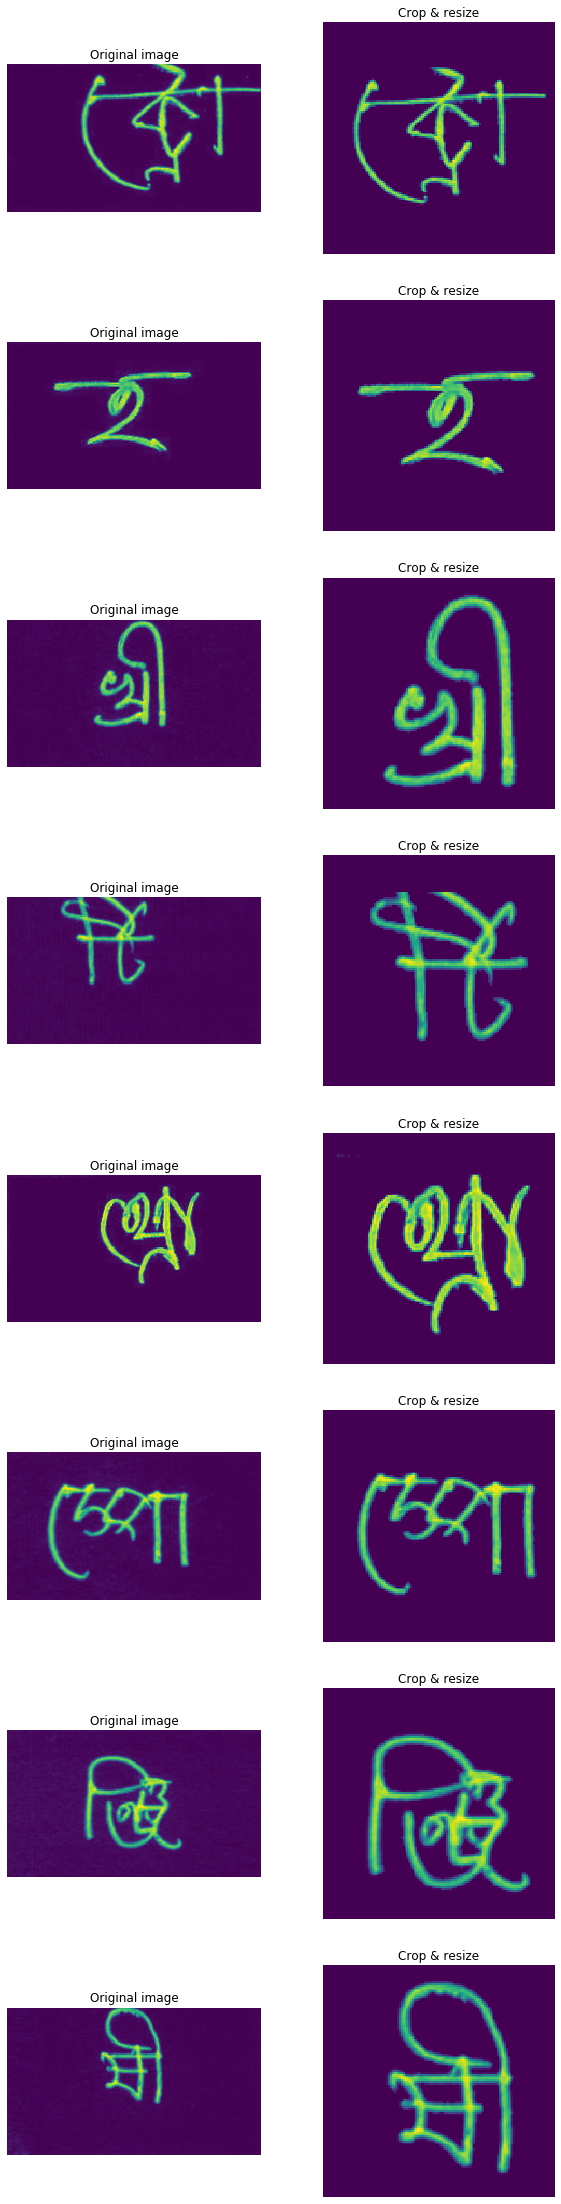

In [8]:
n_imgs = 8
fig, axs = plt.subplots(n_imgs, 2, figsize=(10, 5*n_imgs))

for idx in range(n_imgs):
    #somehow the original input is inverted
    img0 = 255 - df.iloc[idx, 1:].values.reshape(HEIGHT, WIDTH).astype(np.uint8)
    #normalize each image by its max val
    img = (img0*(255.0/img0.max())).astype(np.uint8)
    img = crop_resize(img, inter=cv2.INTER_CUBIC)

    axs[idx,0].imshow(img0)
    axs[idx,0].set_title('Original image')
    axs[idx,0].axis('off')
    axs[idx,1].imshow(img)
    axs[idx,1].set_title('Crop & resize')
    axs[idx,1].axis('off')
plt.show()